<a href="https://colab.research.google.com/github/shojebscodeplay/3-2-project/blob/main/modifiedcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
import pandas as pd

# Read CSV file into DataFrame
data = pd.read_csv('/content/drive/MyDrive/data source/hmnist_28_28_RGB.csv')

# Display first few rows of DataFrame
print(data.head())


   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/data source/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
data.shape

(10015, 2353)

In [ ]:
data.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

<Axes: >

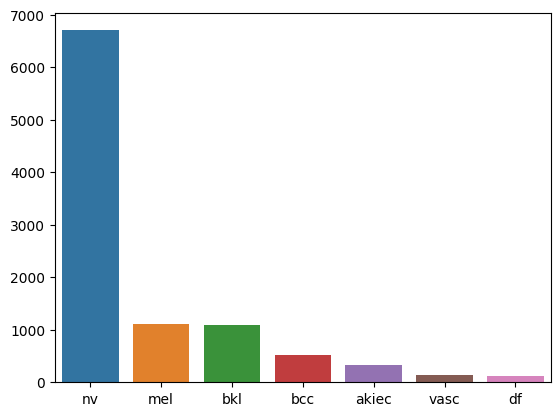

In [ ]:
label_names = [classes[key][0] for key in data['label'].value_counts().index]
sns.barplot(x=label_names, y=data["label"].value_counts().values)


In [ ]:
print(f"""
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {Y_train.shape}
y_test shape: {Y_test.shape}
""")


X_train shape: (37548, 28, 28, 3)
X_test shape: (9387, 28, 28, 3)
y_train shape: (37548,)
y_test shape: (9387,)



In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 1.1950 - accuracy: 0.5389
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 78s 321ms/step - loss: 1.1950 - accuracy: 0.5389 - val_loss: 0.8224 - val_accuracy: 0.6897
Epoch 2/20
235/235 [==============================] - ETA: 0s - loss: 0.6613 - accuracy: 0.7548
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 74s 315ms/step - loss: 0.6613 - accuracy: 0.7548 - val_loss: 0.5480 - val_accuracy: 0.8020
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8432
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 72s 307ms/step - loss: 0.4288 - accuracy: 0.8432 - val_loss: 0.3696 - val_accuracy: 0.8688
Epoch 4/20
235/235 [==============================] - ETA: 0s - loss: 0.3108 - accuracy: 0.8879
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 74s 314ms/step 

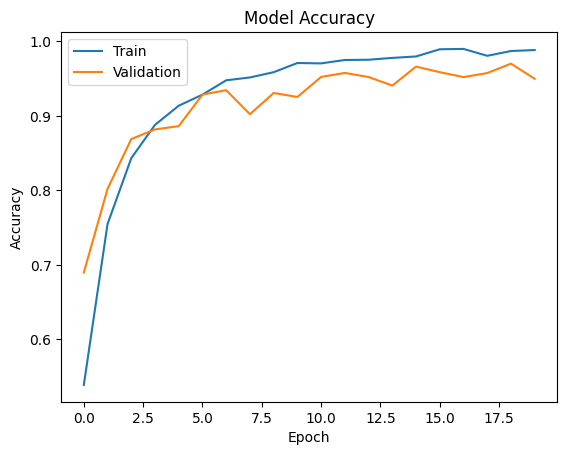

In [ ]:
# Plot the accuracy over the training epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])

# Define the callback function to save the model with the best validation loss
checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min', 
                             verbose=1)

# Train the model and save the best model based on the validation loss
history2 = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[checkpoint])




Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9889
Epoch 1: val_loss improved from inf to 0.16967, saving model to best_model.h5
235/235 [==============================] - 79s 329ms/step - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.1697 - val_accuracy: 0.9631
Epoch 2/20
235/235 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9839
Epoch 2: val_loss did not improve from 0.16967
235/235 [==============================] - 78s 333ms/step - loss: 0.0482 - accuracy: 0.9839 - val_loss: 0.2307 - val_accuracy: 0.9486
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9934
Epoch 3: val_loss improved from 0.16967 to 0.16513, saving model to best_model.h5
235/235 [==============================] - 74s 315ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.1651 - val_accuracy: 0.9708
Epoch 4/20
235/235 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9935
Epoch 4

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.h5')

In [ ]:
from sklearn.metrics import classification_report

# Define the class names based on the classes dictionary
class_names = [classes[key][1] for key in classes.keys()]
# Predict the classes for the test set using the best model
y_pred_prob = best_model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

# Calculate the accuracy on the test set
accuracy = np.mean(y_pred == Y_test)

# Print the accuracy
print('Accuracy on test set: {:.2f}%'.format(accuracy * 100))
# Generate the classification report with class names

class_names = [classes[key][1] for key in classes.keys()]
print(classification_report(Y_test, y_pred, target_names=class_names))



294/294 [==============================] - 6s 20ms/step
Accuracy on test set: 97.75%
                                                  precision    recall  f1-score   support

                                melanocytic nevi       0.99      1.00      1.00      1359
                                        melanoma       0.99      1.00      0.99      1318
                   benign keratosis-like lesions       0.96      0.98      0.97      1262
                            basal cell carcinoma       1.00      1.00      1.00      1351
              pyogenic granulomas and hemorrhage       0.96      0.89      0.93      1374
Actinic keratoses and intraepithelial carcinomae       0.99      1.00      1.00      1358
                                  dermatofibroma       0.95      0.97      0.96      1365

                                        accuracy                           0.98      9387
                                       macro avg       0.98      0.98      0.98      9387
             

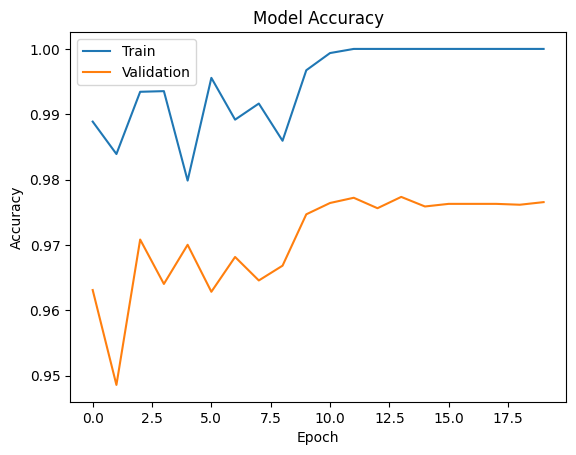

In [ ]:
# Plot the accuracy over the training epochs
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('best_model.h5')

In [ ]:
model.save('best_model.h5')


In [ ]:
!ls


best_model.h5  drive  sample_data


In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)


294/294 - 7s - loss: 0.1262 - accuracy: 0.9775 - 7s/epoch - 23ms/step


In [ ]:
from google.colab.patches import cv2_imshow
srcdir = '/content/drive/MyDrive/data source/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break

NameError: ignored